# Практическая работа №5

## Ансамбли моделей
Выполнил: Самарин Никита КИ21-17/2Б

## Цель работы
Знакомство с теоретическими основами построения ансамблей
алгоритмов, формирование навыков построения ансамблей моделей для
решения задач классификации и регрессии с помощью языка
программирования Python.

## Задачи:
#### Выполнение практической работы предполагает решение следующий задач:
1. Предварительная обработку исходных данных
2. Построение ансамблей моделей (беггинг, бустинг и стекинг)
3. Подбор оптимальных параметров моделей
4. Оценка качества построенных моделей на валидационной/тестовой
выборке

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
import utilities

warnings.filterwarnings("ignore")

In [18]:
regr_cat_attributes = ['Мусоропровод', 'Аварийный', 'Железобетонные.перекрытия', 'Смешанные.перекрытия', 'Деревянные.перекрытия', 'Иные.перекрытия', 'Панельные.стены', 'Блочные.стены', 'Деревянные.стены', 'Кирпичные.стены', 'Монолитные.стены', 'Смешанные.стены', 'Косметический', 'Евроремонт', 'Дизайнерский', 'Без.ремонта', 'Парковка', 'Студия']
regr_num_attributes = ['Количество.комнат', 'Общая.площадь', 'Этаж', 'Этажей.в.доме', 'Год.постройки', 'Школа.1000', 'ВУЗ.1000', 'ТЦ.1000', 'Стоматология.1000', 'Почта.1000', 'Поликлиника.1000', 'Парк.1000', 'Остановка.1000', 'Одежда..1000', 'Супер3кет.1000', 'Кинотеатр.1000', 'Кафе.1000', 'АЗС.1000', 'Детский.сад.1000', 'Бар.1000', 'Банк.1000', 'Аптека.1000', 'Балкон', 'Лоджия', 'Совмещенный.санузел', 'Раздельный.санузел', 'Лифт', 'Грузовой.лифт']
regr_class = 'Цена'

train_regr = pd.read_csv("train_regr.csv", usecols = regr_cat_attributes + regr_num_attributes + [regr_class])

clas_cat_attributes = ['Sex', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']
clas_num_attributes = ['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'IsSeniorCitizen']
clas_class = 'Churn'

train_clas =  pd.read_csv("train_clas.csv", usecols = clas_cat_attributes + clas_num_attributes + [clas_class])

### Предварительная обработка

#### Предобработка данных регрессии

In [19]:
train_regr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Количество.комнат          808 non-null    int64  
 1   Студия                     808 non-null    int64  
 2   Общая.площадь              808 non-null    float64
 3   Этаж                       808 non-null    int64  
 4   Этажей.в.доме              808 non-null    int64  
 5   Парковка                   808 non-null    int64  
 6   Без.ремонта                808 non-null    int64  
 7   Дизайнерский               808 non-null    int64  
 8   Евроремонт                 808 non-null    int64  
 9   Косметический              808 non-null    int64  
 10  Балкон                     808 non-null    int64  
 11  Лоджия                     808 non-null    int64  
 12  Совмещенный.санузел        808 non-null    int64  
 13  Раздельный.санузел         808 non-null    int64  

In [20]:
to_drop = ["Без.ремонта", "Совмещенный.санузел", "Иные.перекрытия"]
train_regr.drop(to_drop, inplace=True, axis=1)
for i in to_drop:
    if i in regr_num_attributes:
        regr_num_attributes.remove(i)
    elif i in regr_cat_attributes:
        regr_cat_attributes.remove(i)

In [21]:
train_regr[regr_num_attributes + [regr_class]] = train_regr[regr_num_attributes + [regr_class]].apply(pd.to_numeric, errors="coerce")

In [22]:
print(train_regr.isnull().sum())

Количество.комнат            0
Студия                       0
Общая.площадь                0
Этаж                         0
Этажей.в.доме                0
Парковка                     0
Дизайнерский                 0
Евроремонт                   0
Косметический                0
Балкон                       0
Лоджия                       0
Раздельный.санузел           0
Лифт                         0
Грузовой.лифт                0
Мусоропровод                 0
Год.постройки                0
Аварийный                    0
Железобетонные.перекрытия    0
Смешанные.перекрытия         0
Деревянные.перекрытия        0
Панельные.стены              0
Блочные.стены                0
Деревянные.стены             0
Кирпичные.стены              0
Монолитные.стены             0
Смешанные.стены              0
Школа.1000                   0
ВУЗ.1000                     0
ТЦ.1000                      0
Стоматология.1000            0
Почта.1000                   0
Поликлиника.1000             0
Парк.100

In [23]:
train_regr_x = train_regr[regr_cat_attributes + regr_num_attributes]
train_regr_y = train_regr[regr_class]
train_regr_x_train, train_regr_x_test, train_regr_y_train, train_regr_y_test = train_test_split(train_regr_x, train_regr_y, test_size=0.3, random_state=42)

#### Предобработка данных классификации

In [24]:
train_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              3169 non-null   int64  
 1   MonthlySpending           3169 non-null   float64
 2   TotalSpent                3169 non-null   object 
 3   Sex                       3169 non-null   object 
 4   IsSeniorCitizen           3169 non-null   int64  
 5   HasPartner                3169 non-null   object 
 6   HasChild                  3169 non-null   object 
 7   HasPhoneService           3169 non-null   object 
 8   HasMultiplePhoneNumbers   3169 non-null   object 
 9   HasInternetService        3169 non-null   object 
 10  HasOnlineSecurityService  3169 non-null   object 
 11  HasOnlineBackup           3169 non-null   object 
 12  HasDeviceProtection       3169 non-null   object 
 13  HasTechSupportAccess      3169 non-null   object 
 14  HasOnlin

In [25]:
train_clas[clas_num_attributes + [clas_class]] = train_clas[clas_num_attributes + [clas_class]].apply(pd.to_numeric, errors="coerce")

In [26]:
print(train_clas.isnull().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  6
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


In [27]:
train_clas = train_clas.fillna(train_clas['TotalSpent'].mean())

In [28]:
label_encoder = LabelEncoder()
for column in clas_cat_attributes:
    train_clas[column] = label_encoder.fit_transform(train_clas[column])

In [29]:
train_clas_x = train_clas[clas_cat_attributes + clas_num_attributes]
train_clas_y = train_clas[clas_class]
train_clas_x_train, train_clas_x_test, train_clas_y_train, train_clas_y_test = train_test_split(train_clas_x, train_clas_y, test_size=0.3, random_state=42)

### Обучение моделей

In [30]:
labels = ['Бэггинг', 'Бустинг', 'Стэкинг']
auc_scores = []
RMSEs = []
r2s = []

#### Бэггинг-классификатор

Лучшая модель с параметром max_features BaggingClassifier(max_features=1, random_state=0)
Результат: 0.7981
Лучшая модель с параметром n_estimators BaggingClassifier(n_estimators=100, random_state=0)
Результат: 0.7925
Лучшая модель с параметром max_samples BaggingClassifier(max_samples=0.1, random_state=0)
Результат: 0.7877
Tuned hpyerparameters (best parameters): {'estimator': LogisticRegression(), 'max_features': 15, 'max_samples': 0.5, 'n_estimators': 50}
Лучшая модель с параметрами {'estimator': LogisticRegression(), 'max_features': 15, 'max_samples': 0.5, 'n_estimators': 50}
Результат: 0.8278


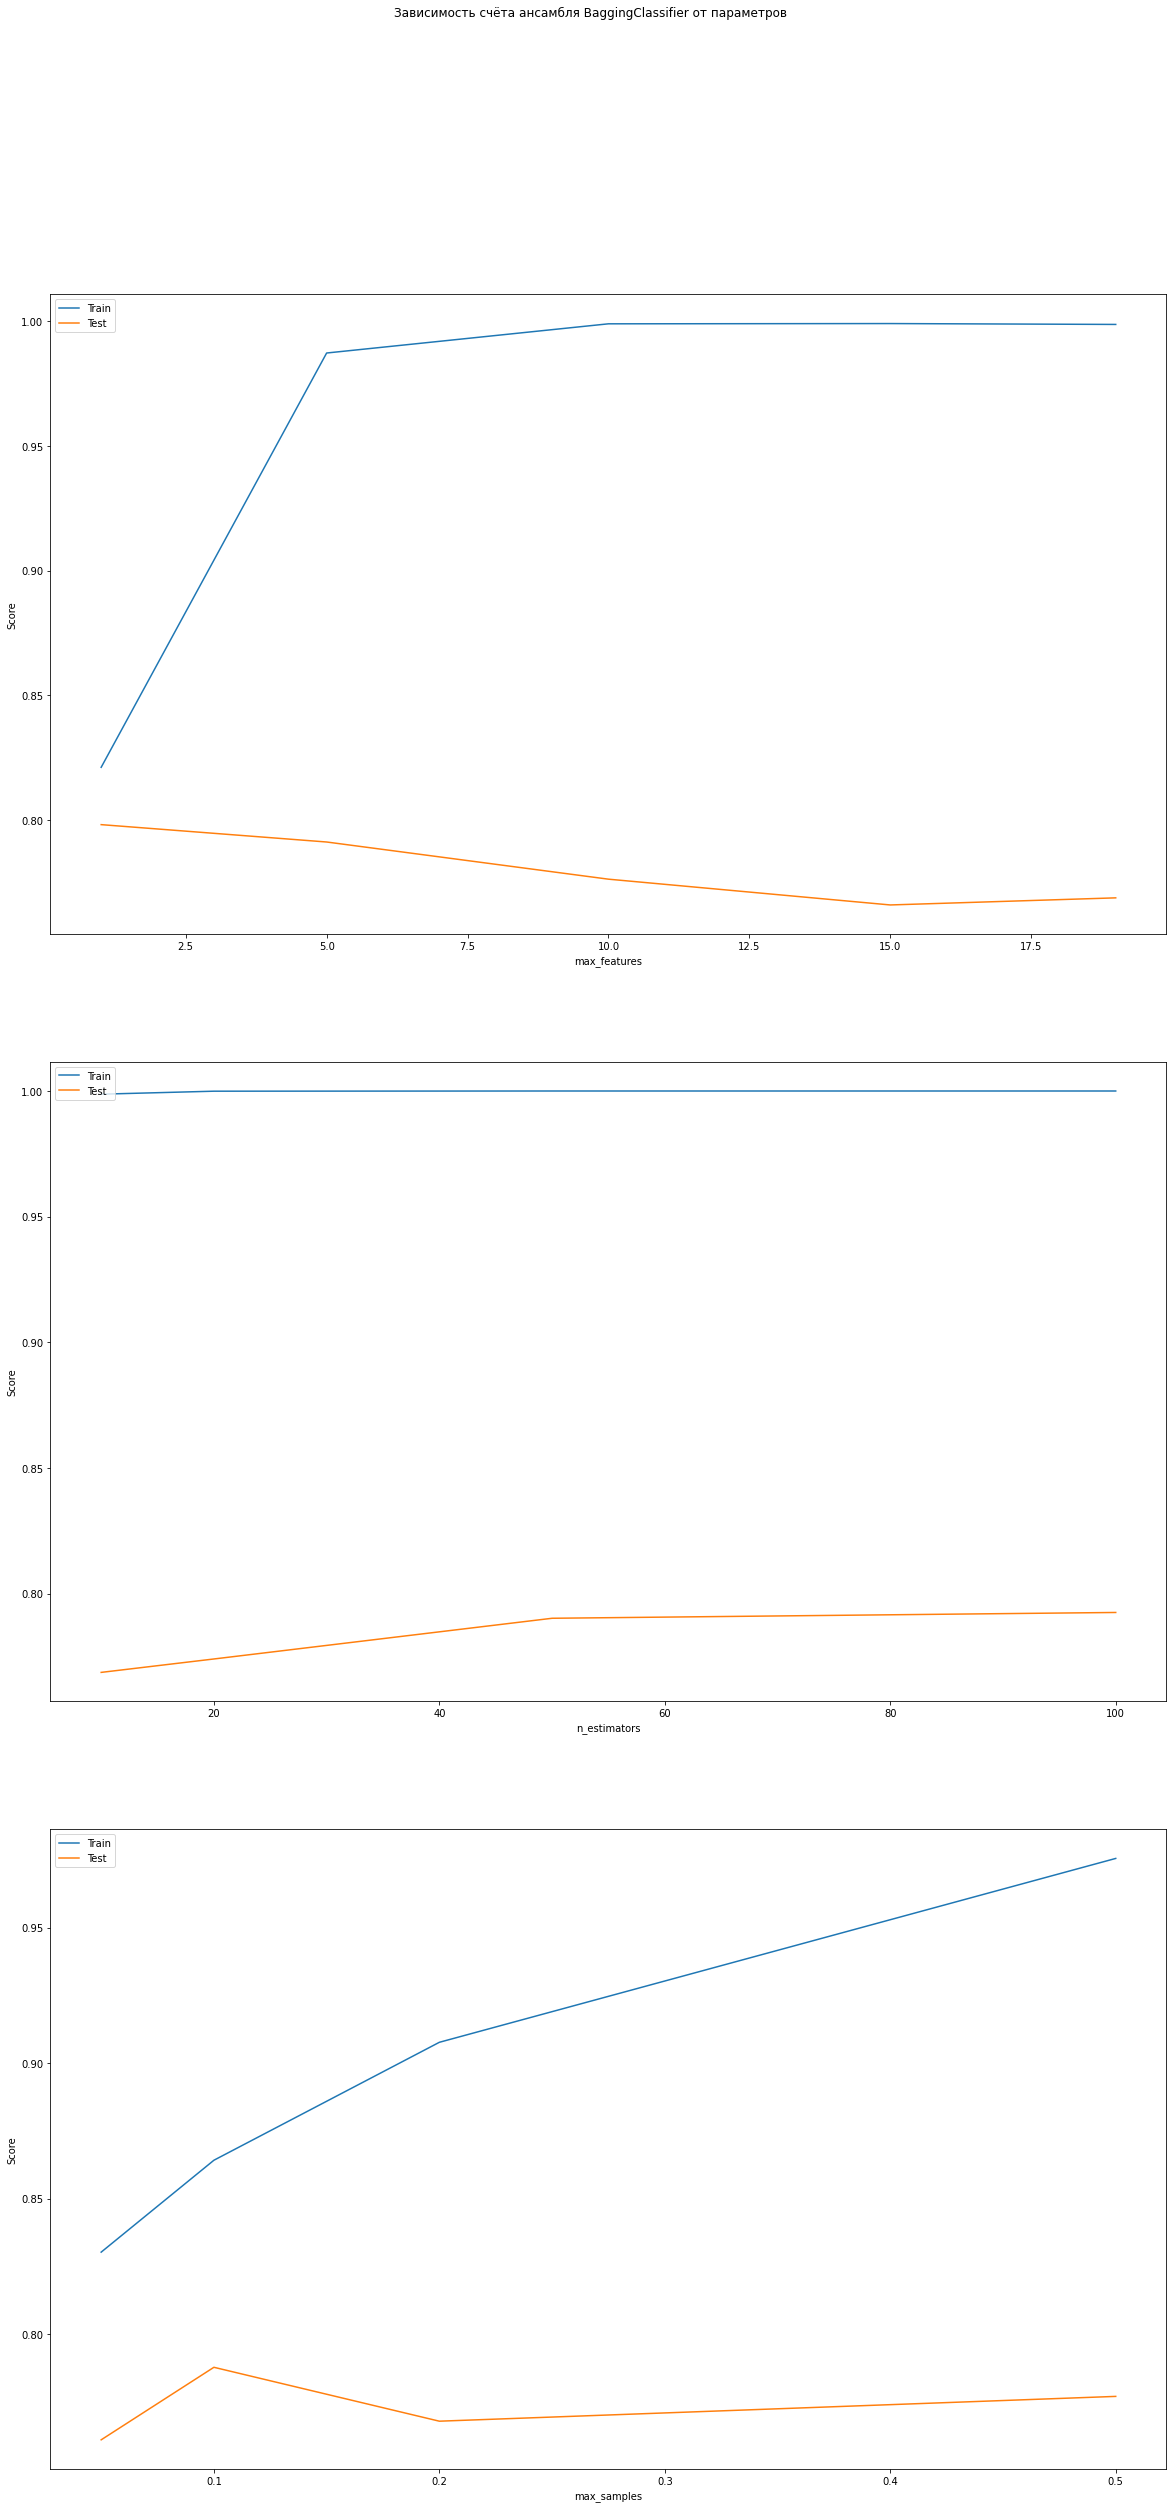

In [31]:
parameters = {
    'max_features':[1,5,10,15,19],
    'n_estimators': [10,20,50,100],
    'max_samples':[0.05,0.1,0.2,0.5]}

g_s_parameters = {
    'estimator': [None, LogisticRegression(), KNeighborsClassifier(), SVC()],
    'max_features':[1,5,10,15,19],
    'n_estimators': [10,20,50,100],
    'max_samples':[0.05,0.1,0.2,0.5]}

begging_clas = utilities.train_begging_clas(parameters, g_s_parameters, train_clas_x_train, train_clas_y_train, train_clas_x_test, train_clas_y_test)
y_test_predict = begging_clas.predict_proba(train_clas_x_test)[:, 1]
auc_scores.append(roc_auc_score(train_clas_y_test, y_test_predict))

#### Бэггинг-регрессор

Лучшая модель с параметром max_features BaggingRegressor(max_features=42, random_state=0)
Результат: 351067.0231
Лучшая модель с параметром n_estimators BaggingRegressor(n_estimators=50, random_state=0)
Результат: 332645.1273
Лучшая модель с параметром max_samples BaggingRegressor(max_samples=0.5, random_state=0)
Результат: 364016.5059
Tuned hpyerparameters (best parameters): {'estimator': None, 'max_features': 42, 'max_samples': 0.5, 'n_estimators': 50}
Лучшая модель с параметрами {'estimator': None, 'max_features': 42, 'max_samples': 0.5, 'n_estimators': 50}
Результат: 333869.1301


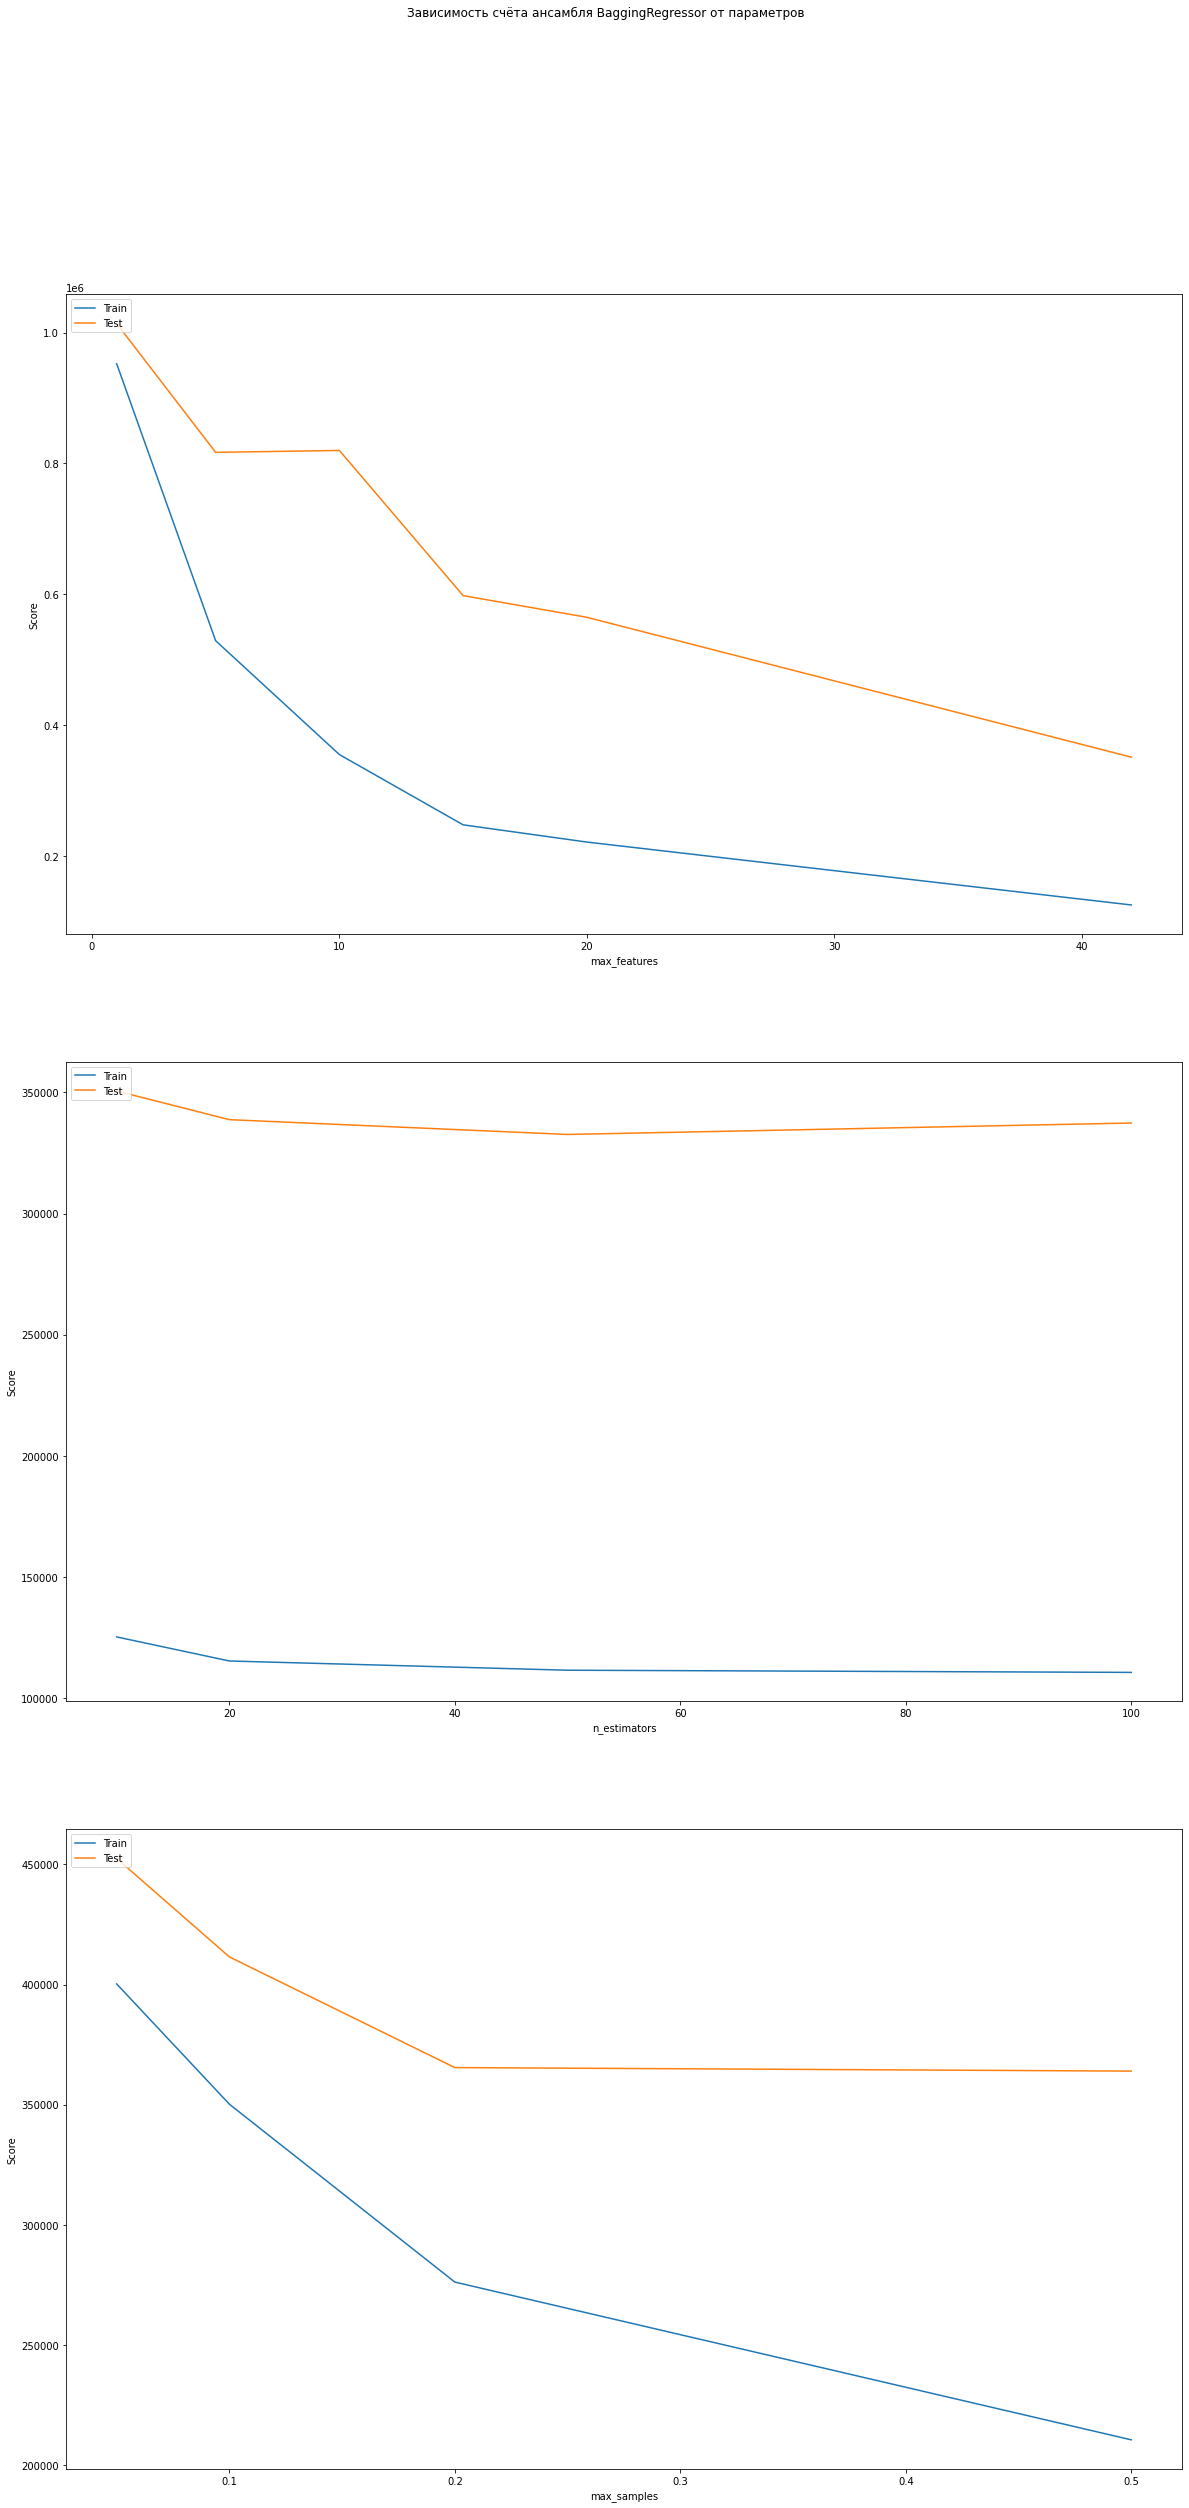

In [32]:
parameters = {
    'max_features':[1,5,10,15,20,42],
    'n_estimators': [10,20,50,100],
    'max_samples':[0.05,0.1,0.2,0.5]}

g_s_parameters = {
    'estimator': [None, LinearRegression(), KNeighborsRegressor(), SVR()],
    'max_features':[1,5,10,15,20,42],
    'n_estimators': [10,20,50,100],
    'max_samples':[0.05,0.1,0.2,0.5]}

begging_regr = utilities.train_begging_regr(parameters, g_s_parameters, train_regr_x_train, train_regr_y_train, train_regr_x_test, train_regr_y_test)
y_test_predict = begging_regr.predict(train_regr_x_test)
RMSEs.append(mean_squared_error(train_regr_y_test, y_test_predict, squared=False))
r2s.append(r2_score(train_regr_y_test, y_test_predict))

#### Бустинг-классификатор

Лучшая модель с параметром learning_rate GradientBoostingClassifier(learning_rate=0.01, random_state=0)
Результат: 0.8326
Лучшая модель с параметром subsample GradientBoostingClassifier(random_state=0, subsample=0.9)
Результат: 0.8290
Лучшая модель с параметром n_estimators GradientBoostingClassifier(n_estimators=20, random_state=0)
Результат: 0.8365
Лучшая модель с параметром max_depth GradientBoostingClassifier(max_depth=4, random_state=0)
Результат: 0.8234
Tuned hpyerparameters (best parameters): {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}
Лучшая модель с параметрами {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}
Результат: 0.8316


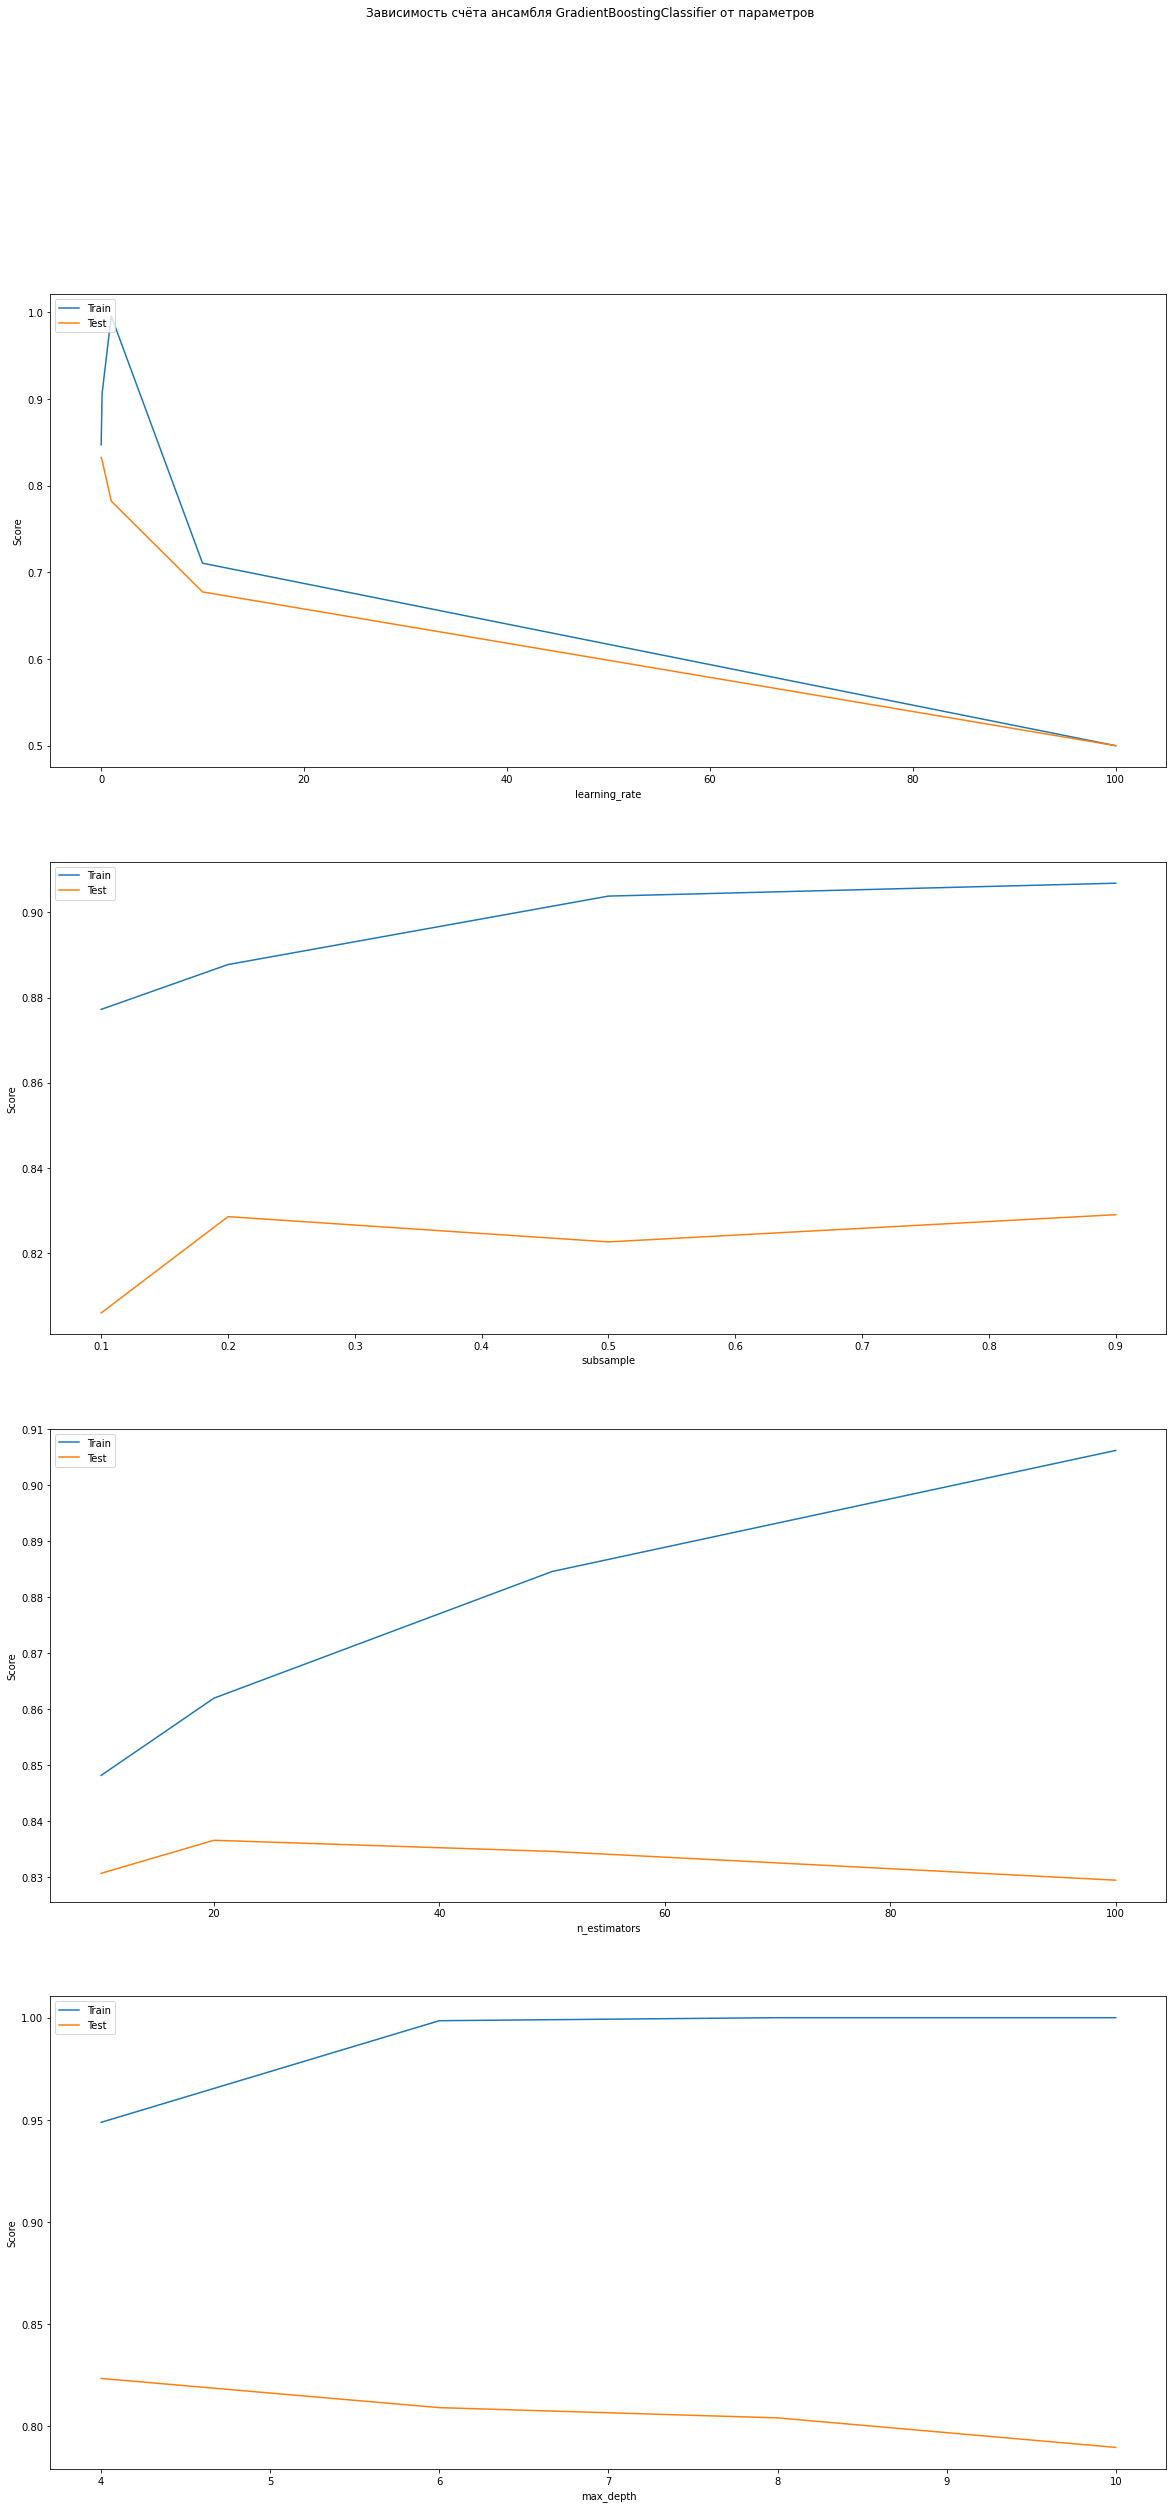

In [33]:
parameters = {
    'learning_rate': [0.01,0.1,1,10,100],
    'subsample': [0.9, 0.5, 0.2, 0.1],
    'n_estimators': [10,20,50,100],
    'max_depth': [4,6,8,10]}

boosting_clas = utilities.train_boosting_clas(parameters, parameters, train_clas_x_train, train_clas_y_train, train_clas_x_test, train_clas_y_test)
y_test_predict = boosting_clas.predict_proba(train_clas_x_test)[:, 1]
auc_scores.append(roc_auc_score(train_clas_y_test, y_test_predict))

#### Бустинг-регрессор

Лучшая модель с параметром learning_rate GradientBoostingRegressor(random_state=0)
Результат: 316088.5484
Лучшая модель с параметром subsample GradientBoostingRegressor(random_state=0, subsample=0.9)
Результат: 318873.2136
Лучшая модель с параметром n_estimators GradientBoostingRegressor(random_state=0)
Результат: 316088.5484
Лучшая модель с параметром max_depth GradientBoostingRegressor(max_depth=4, random_state=0)
Результат: 318706.2419
Tuned hpyerparameters (best parameters): {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}
Лучшая модель с параметрами {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}
Результат: 324344.9462


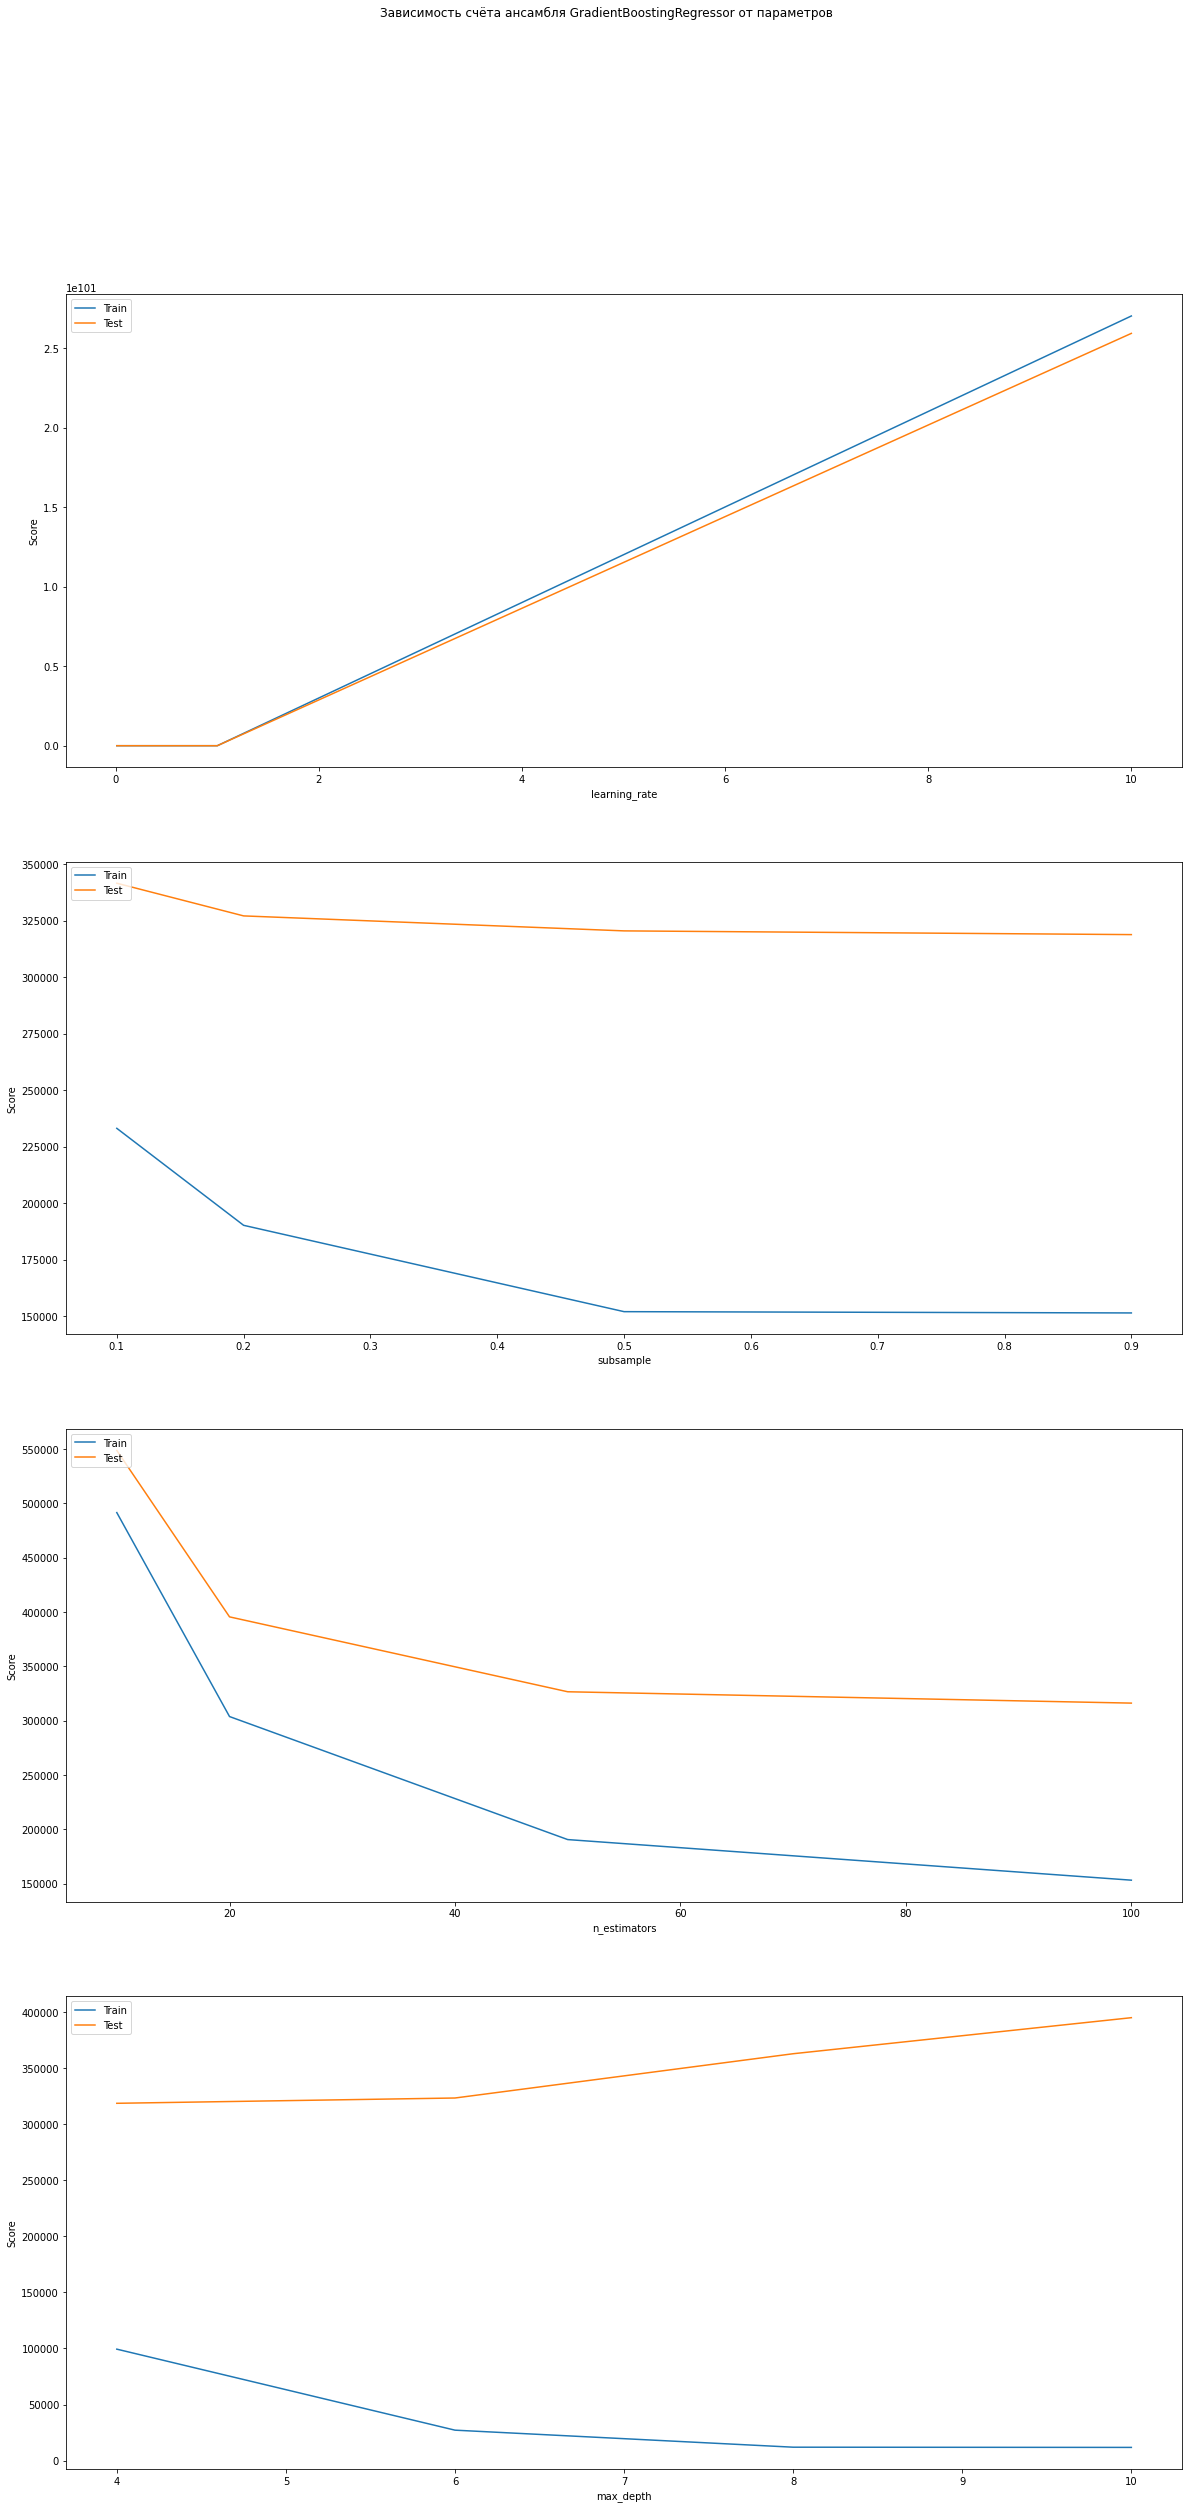

In [34]:
parameters = {
    'learning_rate': [0.01,0.1,1,10,100],
    'subsample': [0.9, 0.5, 0.2, 0.1],
    'n_estimators': [10,20,50,100],
    'max_depth': [4,6,8,10]}

boosting_regr = utilities.train_boosting_regr(parameters, parameters, train_regr_x_train, train_regr_y_train, train_regr_x_test, train_regr_y_test)
y_test_predict = boosting_regr.predict(train_regr_x_test)
RMSEs.append(mean_squared_error(train_regr_y_test, y_test_predict, squared=False))
r2s.append(r2_score(train_regr_y_test, y_test_predict))

#### Стекинг-классификатор

In [35]:
stacking_clas = utilities.train_stacking_clas(train_clas_x_train, train_clas_y_train, train_clas_x_test, train_clas_y_test)
y_test_predict = stacking_clas.predict_proba(train_clas_x_test)[:, 1]
auc_scores.append(roc_auc_score(train_clas_y_test, y_test_predict))

Результат для ('KNeighborsClassifier', 'SVC') 0.7670391061452514
Результат для ('KNeighborsClassifier', 'GaussianNB') 0.8129204802092
Результат для ('KNeighborsClassifier', 'LogisticRegression') 0.8232437893735884
Результат для ('SVC', 'GaussianNB') 0.8092951384761677
Результат для ('SVC', 'LogisticRegression') 0.8214964935219303
Результат для ('GaussianNB', 'LogisticRegression') 0.8223523118982526
Результат для ('KNeighborsClassifier', 'SVC', 'GaussianNB') 0.8123321050754784
Результат для ('KNeighborsClassifier', 'SVC', 'LogisticRegression') 0.823208130274575
Результат для ('KNeighborsClassifier', 'GaussianNB', 'LogisticRegression') 0.8245453464875787
Результат для ('SVC', 'GaussianNB', 'LogisticRegression') 0.8225008914774753
Результат для ('KNeighborsClassifier', 'SVC', 'GaussianNB', 'LogisticRegression') 0.8245810055865922
Лучшая модель:  [('KNeighborsClassifier', KNeighborsClassifier()), ('SVC', SVC()), ('GaussianNB', GaussianNB()), ('LogisticRegression', LogisticRegression())] 0.

#### Стекинг-регрессор

In [36]:
stacking_regr = utilities.train_stacking_regr(train_regr_x_train, train_regr_y_train, train_regr_x_test, train_regr_y_test)
y_test_predict = stacking_regr.predict(train_regr_x_test)
RMSEs.append(mean_squared_error(train_regr_y_test, y_test_predict, squared=False))
r2s.append(r2_score(train_regr_y_test, y_test_predict))

Результат для ('KNeighborsRegressor', 'SVR') 375257.4747825483
Результат для ('KNeighborsRegressor', 'DecisionTreeRegressor') 355169.51152947336
Результат для ('SVR', 'DecisionTreeRegressor') 422559.1009625216
Результат для ('KNeighborsRegressor', 'SVR', 'DecisionTreeRegressor') 357042.22521880065
Лучшая модель:  [('KNeighborsRegressor', KNeighborsRegressor()), ('DecisionTreeRegressor', DecisionTreeRegressor())] 355169.51152947336


### Сравним модели

#### Модели регрессии

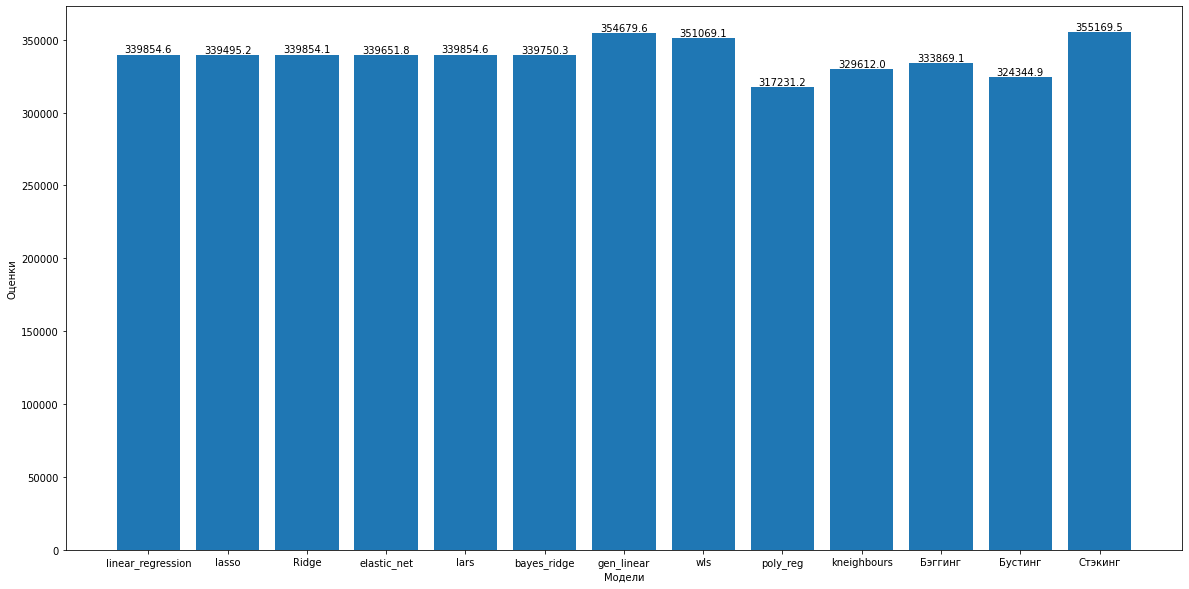

In [37]:
RMSEs = [339854.6, 339495.2, 339854.1, 339651.8, 339854.6, 339750.3, 354679.6, 351069.1, 317231.2, 329612.0, RMSEs[0] // 0.1 / 10, RMSEs[1] // 0.1 / 10, RMSEs[2] // 0.1 / 10]
regr_labels = ['linear_regression', 'lasso', 'Ridge', 'elastic_net', 'lars', 'bayes_ridge', 'gen_linear', 'wls', 'poly_reg', 'kneighbours', labels[0], labels[1], labels[2]]
utilities.build_bar_plot(regr_labels, RMSEs)

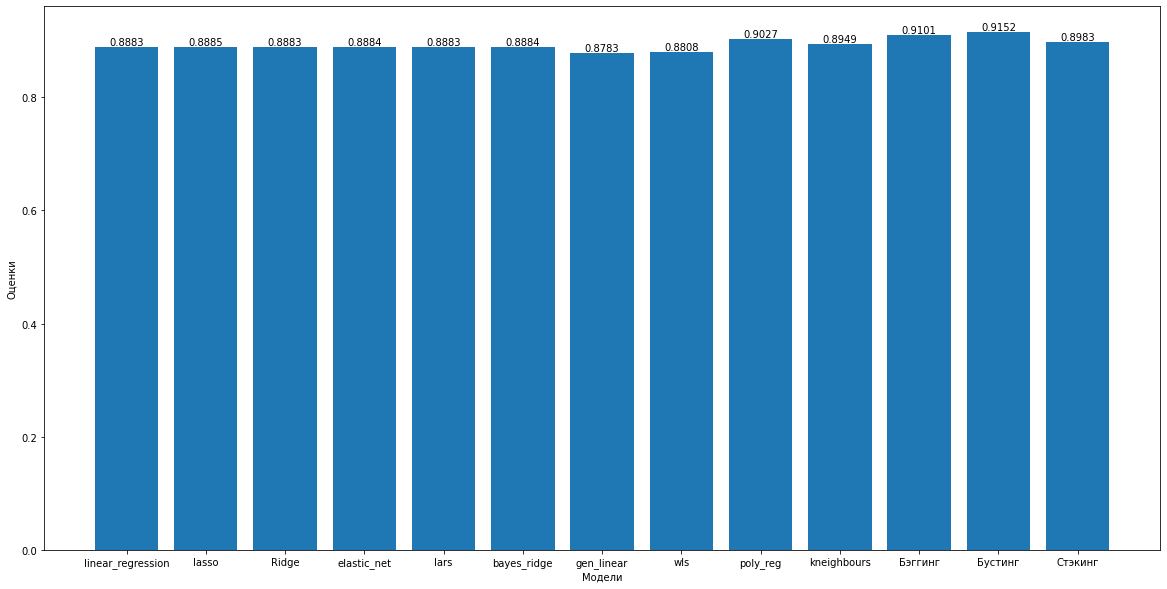

In [38]:
r2s = [0.8883, 0.8885, 0.8883, 0.8884, 0.8883, 0.8884, 0.8783, 0.8808, 0.9027, 0.8949, r2s[0] // 0.0001 / 10000, r2s[1] // 0.0001 / 10000, r2s[2] // 0.0001 / 10000]
utilities.build_bar_plot(regr_labels, r2s)

#### Модели классификации

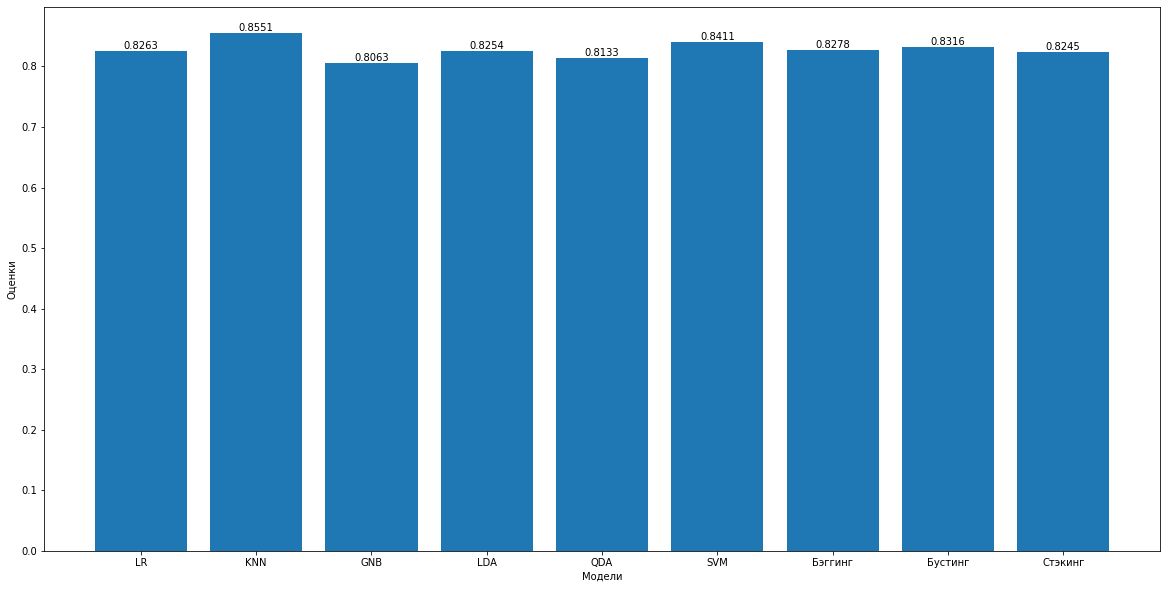

In [39]:
clas_labels = ['LR', 'KNN', 'GNB', 'LDA', 'QDA', 'SVM', labels[0], labels[1], labels[2]]
scores = [0.8263, 0.8551, 0.8063, 0.8254, 0.8133, 0.8411, auc_scores[0] // 0.0001 / 10000, auc_scores[1] // 0.0001 / 10000, auc_scores[2] // 0.0001 / 10000]
utilities.build_bar_plot(clas_labels, scores)